   # Project 
   
   # <center>Digital Talent Scholarship</center>
   
   # <center>Artificial Intelligence - Universitas Hasanuddin</center>
   
   KELAS AI - A
   
   
   Oleh: Agus Arisandi, Aulia Eka Prasiska Wati, Harianto Masdar  

# Machine Learning: Natural Language Processing (NLP)

Natual Language Processing (NLP) atau pengolahan bahasa alami merupakan salah satu bidang ilmu Artificial Intelligence (Kecerdasan Buatan) yang mempelajari. komunikasi antara manusia dengan komputer melalui bahasa alami. 
NLP tidak bertujuan untuk mentransformasikan bahasa yang diterima dalam bentuk suara menjadi data digital dan/atau sebaliknya pula; melainkan bertujuan untuk memahami arti dari ucapan yang diberikan dalam bahasa alami dan memberikan respon yang sesuai, misalnya dengan melakukan suatu aksi tertentu atau menampilkan data tertentu.


Dari beberapa library yang bisa digunakan untuk teknik NLP, pada project ini menggunakan library Natural Language Toolkit (NLTK) dimana NLTK merupakan salah satu tool yang sangat populer pada ilmu Natural Language Processing (NLP) dengan menggunakan bahasa pemrograman Python. Natural Language Toolkit ini sangat mendukung proses pengolahan bahasa natural seperti classification, tokenization, stemming, tagging, parsing dll.


#  STUDI KASUS 
Tamu adalah raja. Itulah mengapa pelayanan menjadi kunci utama suksesnya sebuah restoran. Jika masakan enak, tapi pelayanan dari sambutan, pemesanan, penyajian, hingga saat membayar dirasa kurang, orang tak akan kembali. Maka dari itu Pelayanan terbaik,merupakan kunci suksesnya sebuah restoran. 

Untuk itu pemilik restoran Mbak Aulia selalu meminta pelanggannya untuk memberikan penilaian secara online terhadap masakan dan pengalaman mereka selama Kita memiliki seorang klien pemilik restoran. Pemilik restoran ini selalu meminta pelanggannya untuk memberikan penilaian secara online terhadap masakan dan pengalaman mereka selama bersantap di restorannya. Pemilik restoran tersebut memberikan sekian banyak review (berupa kalimat dalam berbahasa inggris dan berupa skala 0 atau 1, di mana 0 artinya negatif dan 1 artinya positif).

Model NLP yang akan digunakan adalah Bag of Words. Model ini digunakan untuk mengekstraksi (extract) fitur dari sebuah teks atau dokumen. Fitur-fitur yang sudah diekstraksi ini bisa digunakan untuk melatih (training) algoritma ML. Hasil akhirnya adalah berupa vocabulary (kata-kata yang unik) yang muncul di semua dokumen/teks di training set. 

# TENTANG DATASET

Dataset ini berisi 1000 komentar dalam bahasa inggris. Project ini bertujuan untuk menganalisis sentimen negatif dan positif, kemudian menilai tingkat akurasi dari metode Random Forest. Dengan demikian, ke depannya jika ada review lagi melalui media sosial, maka otomatis akan bisa terdeteksi apakah ini review positif dan negatif, tanpa harus dibaca secara manual.

Sebelum memecahkan persoalan ini melalui bahasa Python, silakan download dulu datasetnya di link ini (https://drive.google.com/file/d/10J7h1smTxfCNTRppW5n8yYerXBNYm-J3/view?usp=sharing).

# Library yang dibuthkan

Berikut ini merupaka library yang digunakan pada project ini:
1. Numpy
2. Matplotlib
3. Pandas
4. re
5. Nltk

# Maksud dan Tujuan
Project ini bertujuan untuk menganalisis sentimen negatif dan positif, kemudian menilai tingkat akurasi dari metode Random Forest.

# Referensi

1. http://www.nltk.org
2. https://www.kaggle.com
3. https://www.megabagus.id

In [32]:
# Mengimpor library yang diperlukan
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd 

Mengimpor datasetnya. Kita masih menggunakan perintah pd.read_csv, namun kali ini kita pakai delimiter=’\t’ agar memisahkan data berdasarkan tab (menggunakan format tsv). Kemudian kita buat parameter quoting=3 agar tidak mengikutkan kuotasi (“”)

In [33]:
# Mengimpor dataset
dataset = pd.read_csv('Review_restoran.tsv', delimiter = '\t', quoting = 3)
dataset.head()

,komentar,respon
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


Making a new column to detect how long the text messages are:

In [34]:
dataset['length'] = dataset['komentar'].apply(len)
dataset.head()

,komentar,respon,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


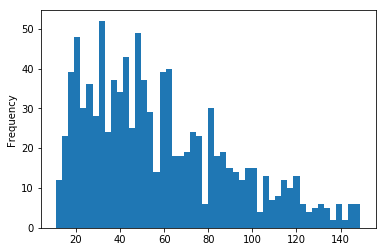

In [35]:
dataset['length'].plot(bins=50, kind='hist')

In [36]:
dataset.length.describe() # Mencari komentar yang paling panjang

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: length, dtype: float64

Menggunakan masking untuk menemukan pesan tersebut, dengn perintah sebagia berikut:

In [37]:
dataset[dataset['length'] == 149]['komentar'].iloc[0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fac2b9997b8>,
      dtype=object)

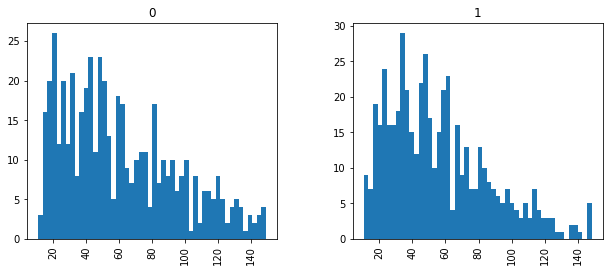

In [38]:
dataset.hist(column='length', by='respon', bins=50,figsize=(10,4)) # Menmbedakan komentar negatif dan positif

In [55]:
# Melihat item pertama di dataset
# melihat kolom ‘komentar’, kemudian diikuti [0] yang artinya melihat item pertama (indeks python dimulai dari nol).
dataset['komentar'][0]
# Mengimpor library re dan NLTK
import re
import nltk
komentar = re.sub('[^a-zA-Z]', ' ', dataset['komentar'][0])
komentar = komentar.lower() # mengolah variabel komentar sehingga semua huruf kapital menjadi huruf kecil
komentar = komentar.split() # mengolah variabel komentar sehingga setiap kata terpisah dari kata yang lain

Library re yang merupakan regular expression. Info lengkap tentang regular expression bisa diklik di (https://www.regular-expressions.info/python.html). Library ini digunakan untuk melakukan cleaning pada teks

Library NLTK. Ini adalah library untuk membersihkan teks (cleaning).

Mendefinisikan variabel "komentar" dengan menggunakan perintah re dan metode sub (ditulis re.sub).
Kita ingin melakukan proses cleaning. Maksudnya adalah kita membuang karakter yang tidak relevan, misalnya titik, articles (a/an/the) dan sebagainya. Sehingga nanti yang tersisa hanya yang relevan saja misalnya kata like yang artinya komentar positif, atau kata angry yang artinya komentar negatif. Selain itu kata yang sama misal loved, love dan loving akan menjadi satu kata saja. Proses cleaning ini disebut dengan stemming.

In [56]:
# Mendownload daftar kata yang ada (vocabulary)
# Di dalamnya adalah kata-kata yang dikenal dalam sebuah bahasa. 
# Intinya kita nanti akan mengeluarkan kata-kata yang termasuk di dalam stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords #mengaktifkan stopwords yang sudah didownload 

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/namasayapucuk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
# Memeriksa daftar kata di stopwords
inggris = stopwords.words('english')

Perintah diatas merupakan perintah untuk mendefinisikan variabel inggris untuk melihat vocabulary yang sudah ada di nltk. Kurang lebih ada 179 kosakata yang ada. Di dalamnya termasuk artikel seperti ‘a’, ‘an’, dan ‘the’, termasuk juga determiner seperti ‘this’, ‘that’ dan lain-lain

In [58]:
# Menghilangkan kata yang tidak ada di stopwords
# Maksudnya adalah Kita akan meng-exclude (mengeluarkan) kata-kata yang termasuk di dalam stopwords
komentar = [word for word in komentar if not word in inggris]

In [59]:
# Melakukan proses stemming (penggunaan kata dasar)
from nltk.stem.porter import PorterStemmer # Mengimpor PorterStemmer untuk melakukan proses stemming
ps = PorterStemmer() # Mendefinisikan variabel ps untuk mengaktifkan PorterStemmer yang sudah diimpor.

PorterStemmer adalah proses untuk kata dasar berbahasa inggris

In [44]:
# Membersihkan kalimat dari kata yang ada di stopwords
komentar = [ps.stem(word) for word in komentar if not word in inggris]
komentar = ' '.join(komentar)

In [45]:
# Melakukan proses cleaning pada teks
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, len(dataset)):
    komentar = re.sub('[^a-zA-Z]', ' ', dataset['komentar'][i])
    komentar = komentar.lower()
    komentar = komentar.split()
    ps = PorterStemmer()
    komentar = [ps.stem(word) for word in komentar if not word in inggris]
    komentar = ' '.join(komentar)
    corpus.append(komentar)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/namasayapucuk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Perintah di atas mengulangi perintah-perintah sebelumnya. Namun kali ini tidak melakukan hanya untuk 1 item saja, melainkan semua item yang ada di dataset.

perintah "corpus [    ]" mendefinisikan sebuah list kosong bernama corpus. Corpus ini akan berisikan semua item yang terdeteksi oleh NLTK yang sudha melalui seleksi stopwords dan stemming 

perintah "corpus.append(komentar)" untuk memasukkan setiap item yang melewati seleksi stopwords dan stemming ke dalam list corpus. Caranya adalah dengan metode append.

In [46]:
# Membuat model Bag of Words
#  mengimpor CountVectorizer dari sklearn.feature_extraction.text untuk membuat model bag of words.
from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer() 
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

Mendefinisikan variabel cv untuk mengaktifkan CountVectorizer

Mendefinisikan variabel independen X kita dengan melakukan proses cv dan fit_transform variabel corpus yang sudah kita buat. Metode .toarray() adalah untuk menjadikan variabel X yang sebelumnya adalah matriks dari corpus menjadi sebuah array.

Mendefinisikan variabel dependen, dengan memilih semua baris dan hanya kolom kedua saja (apakah ia masuk ke komentar positif atau negatif).

In [47]:
# Membagi dataset ke dalam Training dan Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [48]:
# Mengkasifikasikan data Menggunakan Metode Random Forest
from sklearn.ensemble import RandomForestClassifier
classifierRF = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
classifierRF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Pemodelan ini bertujuan untuk memprediksi nilai y_test dengan menggunakan X_test. Hasil prediksi tersesebut sebut bernama y_pred. Nantinya y_pred akan dibandingkan dengan y_test yang sesungguhnya. Jika sangat mirip, maka ditunjukkan dengan nilai akurasi tinggi. Sebaliknya jika tidak mirip, akurasinya rendah.

In [49]:
# Memprediksi hasil Test Set dengan Random Forest
y_pred_RF = classifierRF.predict(X_test)

In [50]:
# Membuat Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_RF = confusion_matrix(y_test, y_pred_RF)

Confusion matrix adalah suatu metode yang biasanya digunakan untuk melakukan perhitungan akurasi pada konsep data mining atau Sistem Pendukung Keputusan. Pada pengukuran kinerja menggunakan confusion matrix, terdapat 4 (empat) istilah sebagai representasi hasil proses klasifikasi. Keempat istilah tersebut adalah True Positive (TP), True Negative (TN), False Positive (FP) dan False Negative (FN). Nilai True Negative (TN) merupakan jumlah data negatif yang terdeteksi dengan benar, sedangkan False Positive (FP) merupakan data negatif namun terdeteksi sebagai data positif. Sementara itu, True Positive (TP) merupakan data positif yang terdeteksi benar. False Negative (FN) merupakan kebalikan dari True Positive, sehingga data posifit, namun terdeteksi sebagai data negatif

Sumber: http://www.kuliahkomputer.com/2018/07/pengujian-dengan-confusion-matrix.html

In [51]:
cm_RF

array([[87, 10],
       [46, 57]])

In [52]:
# Menilai akurasi metode Random Forest
akurasi_RF = ((cm_RF[0][0]+cm_RF[1][1])/(cm_RF[0][0]+cm_RF[1][1]+cm_RF[0][1]+cm_RF[1][0]))*100

In [53]:
akurasi_RF

72.0

# Dokumentasi Error

Untuk melihat dokementasi errornya silahkan klik link dibawah ini:
https://drive.google.com/file/d/0B5ORSJLZb3x-Q0pSd0ZkRmZkUmFhZ2JzVXkwZGxyREJ4eEd3/view?usp=sharing